In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

from sklearn.metrics import r2_score,mean_squared_error



In [3]:
df = pd.read_pickle('pickled_parquet_2.pkl')

In [4]:
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'total_sec', 'duration', 'PUmonth', 'DOmonth', 'PUday',
       'DOday', 'PUhour', 'DOhour', 'PUtime', 'DOtime'],
      dtype='object')

In [5]:
le=LabelEncoder()
df['PUday'] = le.fit_transform(df['PUday'])
df['PUtime'] = le.fit_transform(df['PUtime'])

In [6]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'total_sec', 'duration', 'PUmonth', 'DOmonth', 'PUday',
       'DOday', 'PUhour', 'DOhour', 'PUtime', 'DOtime'],
      dtype='object')

In [7]:
dftrain = df[['passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','total_sec','PUhour','PUday','PUtime']]

In [8]:
dftest = df['total_amount']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(dftrain,dftest,test_size=0.3)

In [ ]:
#LINEAR REGRESSION

lregr = LinearRegression()
lregr.fit(x_train,y_train)
LR_y_test_pred = lregr.predict(x_test)

In [27]:
# ERROR METRICS

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,LR_y_test_pred))
print("RMSE: %f" % (rmse))

# The Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,LR_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,LR_y_test_pred))

accuracy = r2_score(y_test,LR_y_test_pred)
print ("Cross-Predicted Accuracy:", accuracy)

RMSE: 3.161755
Mean squared error: 10.00
Variance score: 0.84
Cross-Predicted Accuracy: 0.8360421752185392


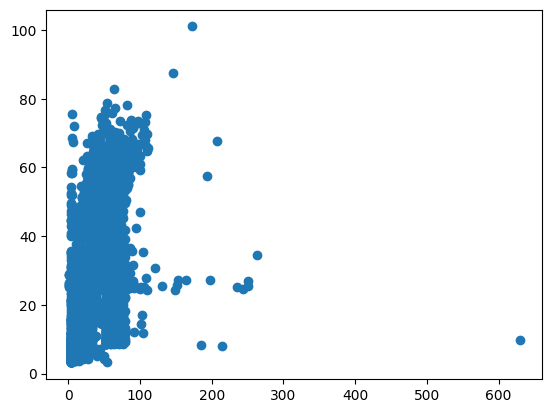

In [25]:
plt.scatter(y_test,LR_y_test_pred)

In [21]:
res_LR = LR_y_test_pred-y_test
res_LR.describe()

count    536343.000000
mean          0.001592
std           3.161757
min        -619.405102
25%          -0.765648
50%           0.020077
75%           0.981347
max          71.363073
Name: total_amount, dtype: float64

In [22]:
res_LR = res_LR[res_LR>-10]
res_LR = res_LR[res_LR<10]

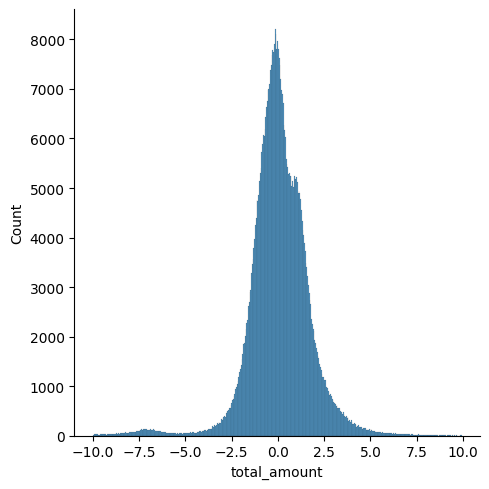

In [23]:
sns.displot(res_LR)

In [15]:
(predictions-dftest).describe()

count    1.787810e+06
mean    -1.641175e-02
std      3.209548e+00
min     -7.864574e+02
25%     -7.921686e-01
50%      7.114108e-03
75%      9.744840e-01
max      7.743878e+01
Name: total_amount, dtype: float64

Cross val score :  [0.85707239 0.83506417 0.8375491  0.81215575 0.79192161 0.85583418]
Cross-Predicted Accuracy: 0.8325909503869393


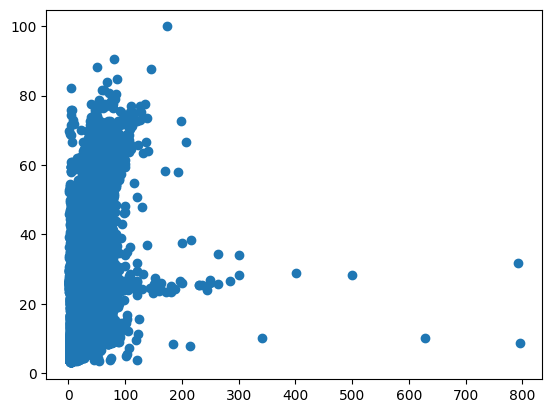

In [24]:
score = cross_val_score(lregr, dftrain, dftest,cv=6)
print('Cross val score : ',score)

    
predictions = cross_val_predict(lregr, dftrain, dftest, cv=6)
plt.scatter(dftest, predictions)

accuracy = r2_score(dftest,predictions)
print ("Cross-Predicted Accuracy:", accuracy)

## Decision Tree Regression


RMSE: 3.232199
Mean squared error: 10.45
Variance score: 0.83


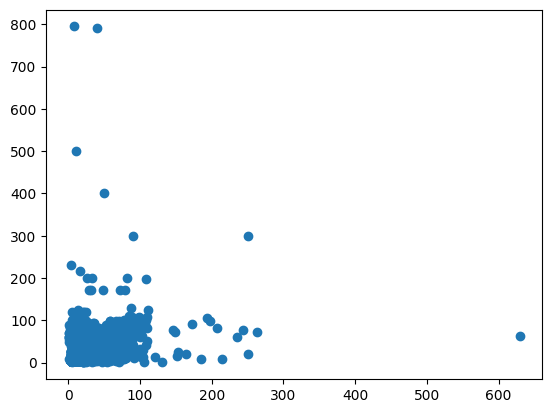

In [26]:
# TRAINING USING DECISION TREE REGRESSOR MODEL

dtr = DecisionTreeRegressor().fit(x_train,y_train)
DTR_y_test_pred = dtr.predict(x_test)

# Error Metrics

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,DTR_y_test_pred))
print("RMSE: %f" % (rmse))

# Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,DTR_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,DTR_y_test_pred))
plt.scatter(y_test,DTR_y_test_pred)

In [31]:
res_DTR = y_test-DTR_y_test_pred
res_DTR.describe()

count    536343.000000
mean         -0.017378
std           3.232156
min        -787.020000
25%          -1.000000
50%           0.000000
75%           1.000000
max         565.710000
Name: total_amount, dtype: float64

In [32]:
res_DTR = res_DTR[res_DTR>=-10]
res_DTR = res_DTR[res_DTR<=10]

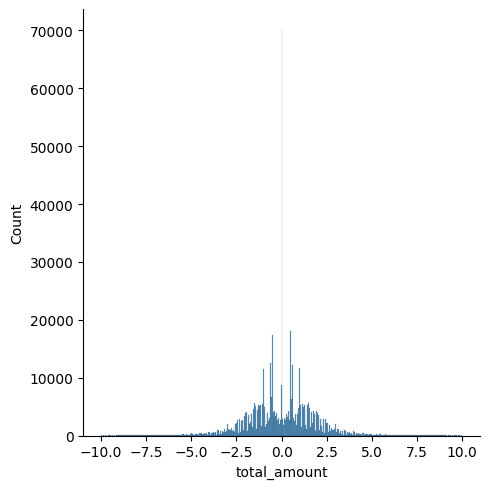

In [33]:
sns.displot(res_DTR)

## Random Forest Regression

In [ ]:
# TRAINING USING DECISION TREE REGRESSOR MODEL

RF = RandomForestRegressor(n_estimators=12)
RF.fit(x_train,y_train)

In [64]:
RF_y_test_pred = RF.predict(x_test)

RMSE: 2.159547
Mean squared error: 4.66
Variance score: 0.92


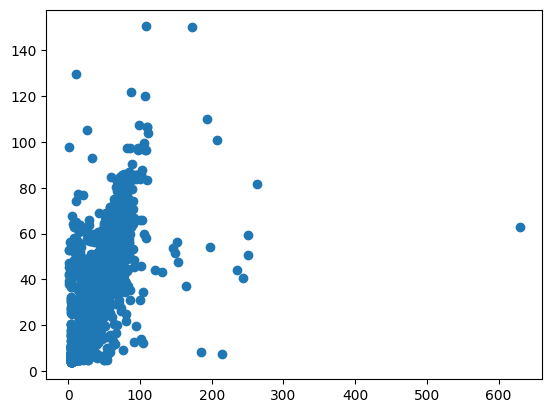

In [65]:
# Error Metrics

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,RF_y_test_pred))
print("RMSE: %f" % (rmse))

# Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,RF_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,RF_y_test_pred))
plt.scatter(y_test,RF_y_test_pred)

In [66]:
res_RF = y_test - RF_y_test_pred

In [67]:
res_RF.describe()

count    536343.000000
mean         -0.000997
std           2.159549
min        -119.151391
25%          -0.918436
50%           0.085157
75%           0.856679
max         566.563928
Name: total_amount, dtype: float64

In [68]:
res_RF = res_RF[res_RF>=-10]
res_RF = res_RF[res_RF<=10]

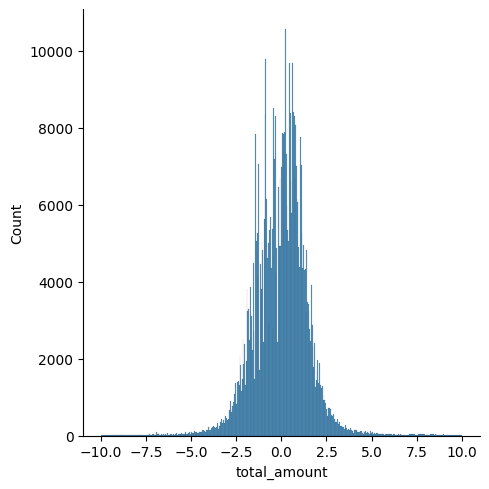

In [69]:
sns.displot(res_RF)

In [62]:
RandomForestRegressor?

In [6]:
!pip install shapely

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import geopandas as gpd

# Path to the "taxi_zones" shapefile
shapefile_path = "/home/user/Desktop/wheres-my-taxi/wheres-my-taxi/geo_export_4323a1fa-9e81-4f79-bb4c-9011fa40138e.shp"

# Read the shapefile into a GeoDataFrame
taxi_zones = gpd.read_file(shapefile_path)


In [11]:
from shapely.geometry import Point

# Example coordinates (replace with your actual coordinates)
latitude = 40.716278
longitude = -73.917156

# Create a Shapely Point
point = Point(longitude, latitude)

# Check which zone contains the point
matching_zone = taxi_zones[taxi_zones.geometry.contains(point)]

# Print the result
if not matching_zone.empty:
    zone_name = matching_zone.iloc[0]['zone']
    print(f"The coordinates are in the {(zone_name)} zone.")
else:
    print("No matching zone found.")


The coordinates are in the Maspeth zone.
